In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/My Drive/AIML_NoteBooks/LabAndAssignments/diabetes.csv")
data.head()
# Eye ball the imported dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

### Check dimension of dataset

In [5]:
print(data.describe())
print(data.shape)

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]
(768, 9)


### Check distribution of dependent variable, Outcome and plot it (1 Marks)

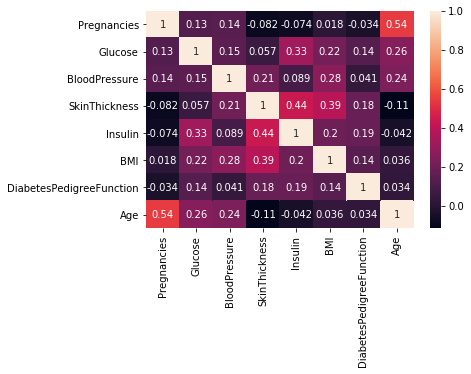

In [6]:
sns.heatmap(X.corr(), annot = True)

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

In [0]:
# Check data types and info of dataset

### Check data distribution using summary statistics and provide your findings(2 Marks)

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [9]:
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0  ...  33.6                     0.627   50

[1 rows x 8 columns]
[  6.  148.   72.   35.  155.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6    148.0           72.0           35.0    155.0  33.6   50
1            1     85.0           66.0           29.0    155.0  26.6   31
2            8    183.0           64.0           29.0    155.0  23.3   32
3            1     89.0           66.0           23.0     94.0  28.1   21
4            0    137.0           40.0           35.0    168.0  43.1   33
[[  6. 148. 155.  50.]
 [  1.  85. 155.  31.]
 [  8. 183. 155.  32.]
 ...
 [  5. 121. 112.  30.]
 [  1. 126. 155.  47.]
 [  1.  93. 155.  23.]]


#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

Doing feature scaling.

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Train Support Vector Machine Model(1 Marks)

In [12]:
# use from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# your insights

### Scale the data points using MinMaxScaler ( 1 Marks)

In [0]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [0]:
y_pred = classifier.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[  0 107]
 [  0  47]]
0.46766169154228854
0.3051948051948052


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [18]:
classifier = SVC(C=1000,random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
y_pred = classifier.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[97 10]
 [23 24]]
0.5925925925925926
0.7857142857142857


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

In [0]:
gs.best_estimator_

In [0]:
gs.best_score_ 